In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [9]:
df = pd.read_excel("dataxl.xlsx", engine='openpyxl', nrows=20000)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    20000 non-null  object        
 1   StockCode    20000 non-null  object        
 2   Description  19929 non-null  object        
 3   Quantity     20000 non-null  int64         
 4   InvoiceDate  20000 non-null  datetime64[ns]
 5   UnitPrice    20000 non-null  float64       
 6   CustomerID   13347 non-null  float64       
 7   Country      20000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.2+ MB


InvoiceNo         0
StockCode         0
Description      71
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6653
Country           0
dtype: int64

In [12]:
df.dropna(subset=['CustomerID'], inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13347 entries, 0 to 19998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    13347 non-null  object        
 1   StockCode    13347 non-null  object        
 2   Description  13347 non-null  object        
 3   Quantity     13347 non-null  int64         
 4   InvoiceDate  13347 non-null  datetime64[ns]
 5   UnitPrice    13347 non-null  float64       
 6   CustomerID   13347 non-null  float64       
 7   Country      13347 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 938.5+ KB


In [15]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [18]:
df['Country'].value_counts()

Country
United Kingdom    12370
Germany             256
France              197
Norway              147
EIRE                134
Portugal             80
Lithuania            35
Iceland              31
Italy                25
Australia            22
Japan                17
Belgium              12
Poland                8
Switzerland           6
Spain                 5
Netherlands           2
Name: count, dtype: int64

<Axes: title={'center': 'Top Countries by Revenue'}, xlabel='Country'>

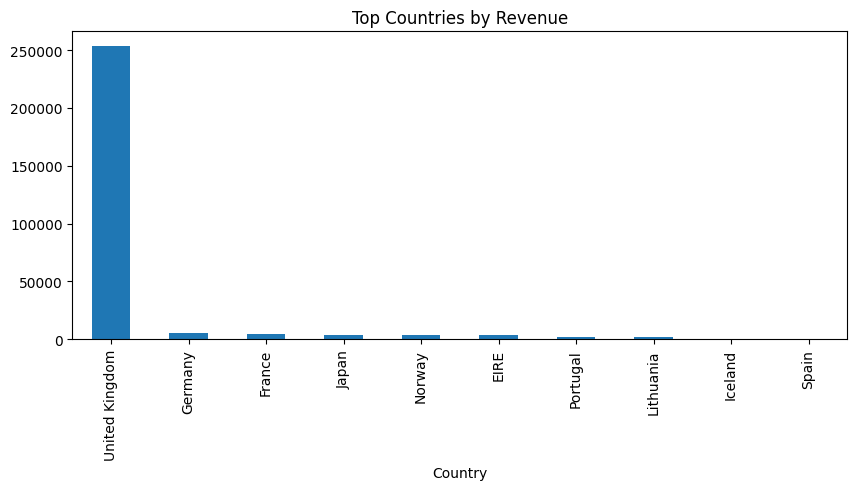

In [21]:
revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

revenue.plot(kind='bar', figsize=(10,4), title='Top Countries by Revenue')


In [42]:
filtered_df = df[df['TotalPrice'] < 500]

fig = px.histogram(filtered_df, x='TotalPrice', nbins=50, title='TotalPrice Distribution (Filtered < $500)')
fig.update_layout(xaxis_title='Total Price', yaxis_title='Count of Transactions')
fig.show()


<Axes: title={'center': 'Top 15 Selling Products'}, ylabel='Description'>

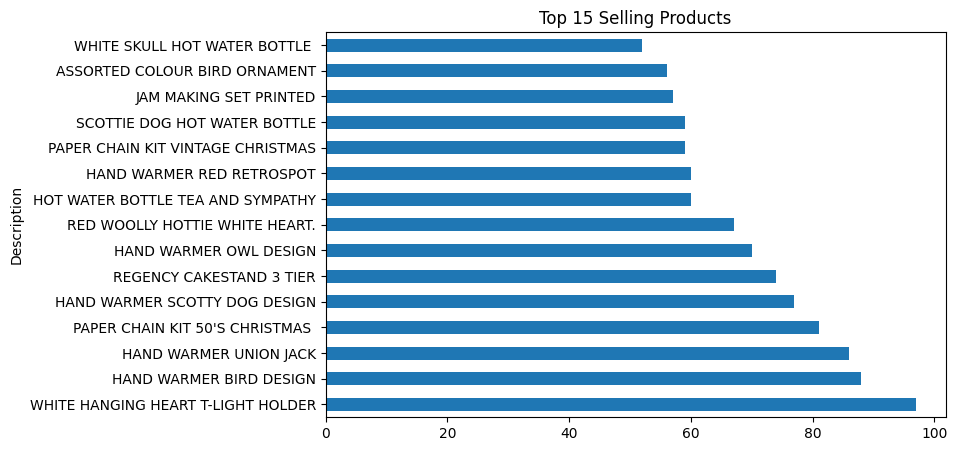

In [32]:
top_products = df['Description'].value_counts().head(15)
top_products.plot(kind='barh', figsize=(8,5), title='Top 15 Selling Products')
